This code give the Monte Carlo fit and error propogation for Us-up and T-Us on the principal Hugoniot of olivine. This document is for submission with Chidester et al. (2021) at GRL.

Read in data

In [2]:
import numpy as np

##All olivine liquid data for fitting Us-up relation
upol = np.genfromtxt('SuppDataforCalcs.csv',delimiter=',',skip_header=1,usecols=[6],max_rows=27)
upolerr = np.genfromtxt('SuppDataforCalcs.csv',delimiter=',',skip_header=1,usecols=[7],max_rows=27)
Usol = np.genfromtxt('SuppDataforCalcs.csv',delimiter=',',skip_header=1,usecols=[4],max_rows=27)
Usolerr = np.genfromtxt('SuppDataforCalcs.csv',delimiter=',',skip_header=1,usecols=[5],max_rows=27)

ZUs_temp = np.genfromtxt('SuppDataforCalcs.csv',delimiter=',',skip_header=28,usecols=[4],max_rows=6)
ZUs_temp_err = np.genfromtxt('SuppDataforCalcs.csv',delimiter=',',skip_header=28,usecols=[5],max_rows=6)
ZT_temp = np.genfromtxt('SuppDataforCalcs.csv',delimiter=',',skip_header=28,usecols=[12],max_rows=6)
ZT_temp_err = np.genfromtxt('SuppDataforCalcs.csv',delimiter=',',skip_header=28,usecols=[13],max_rows=6)
ZP_temp = np.genfromtxt('SuppDataforCalcs.csv',delimiter=',',skip_header=28,usecols=[8],max_rows=6)
ZP_temp_err = np.genfromtxt('SuppDataforCalcs.csv',delimiter=',',skip_header=28,usecols=[9],max_rows=6)

#Zdata for plotting
upZ = np.genfromtxt('SuppDataforCalcs.csv',delimiter=',',skip_header=1,usecols=[6],max_rows=14)
upZerr = np.genfromtxt('SuppDataforCalcs.csv',delimiter=',',skip_header=1,usecols=[7],max_rows=14)
UsZ = np.genfromtxt('SuppDataforCalcs.csv',delimiter=',',skip_header=1,usecols=[4],max_rows=14)
UsZerr = np.genfromtxt('SuppDataforCalcs.csv',delimiter=',',skip_header=1,usecols=[5],max_rows=14)
PZ = np.genfromtxt('SuppDataforCalcs.csv',delimiter=',',skip_header=1,usecols=[8],max_rows=14)
PZerr = np.genfromtxt('SuppDataforCalcs.csv',delimiter=',',skip_header=1,usecols=[9],max_rows=14)
rhoZ = np.genfromtxt('SuppDataforCalcs.csv',delimiter=',',skip_header=1,usecols=[10],max_rows=14)
rhoZerr = np.genfromtxt('SuppDataforCalcs.csv',delimiter=',',skip_header=1,usecols=[11],max_rows=14)

#Omega data for plotting
upmeasolEP = np.genfromtxt('SuppDataforCalcs.csv',delimiter=',',skip_header=15,usecols=[6],max_rows=8)
upmeasolEPerr = np.genfromtxt('SuppDataforCalcs.csv',delimiter=',',skip_header=15,usecols=[7],max_rows=8)
UsmeasolEP = np.genfromtxt('SuppDataforCalcs.csv',delimiter=',',skip_header=15,usecols=[4],max_rows=8)
UsmeasolEPerr = np.genfromtxt('SuppDataforCalcs.csv',delimiter=',',skip_header=15,usecols=[5],max_rows=8)
PmeasolEP = np.genfromtxt('SuppDataforCalcs.csv',delimiter=',',skip_header=15,usecols=[8],max_rows=8)
PmeasolEPerr = np.genfromtxt('SuppDataforCalcs.csv',delimiter=',',skip_header=15,usecols=[9],max_rows=8)
rhomeasolEP = np.genfromtxt('SuppDataforCalcs.csv',delimiter=',',skip_header=15,usecols=[10],max_rows=8)
rhomeasolEPerr = np.genfromtxt('SuppDataforCalcs.csv',delimiter=',',skip_header=15,usecols=[11],max_rows=8)

#QMD data for plotting
QMDup = np.genfromtxt('SuppDataforCalcs.csv',delimiter=',',skip_header=34,usecols=[6],max_rows=7)
QMDuperr = np.genfromtxt('SuppDataforCalcs.csv',delimiter=',',skip_header=34,usecols=[7],max_rows=7)
QMDUs = np.genfromtxt('SuppDataforCalcs.csv',delimiter=',',skip_header=34,usecols=[4],max_rows=7)
QMDUserr = np.genfromtxt('SuppDataforCalcs.csv',delimiter=',',skip_header=34,usecols=[5],max_rows=7)
QMDP = np.genfromtxt('SuppDataforCalcs.csv',delimiter=',',skip_header=34,usecols=[8],max_rows=7)
QMDPerr = np.genfromtxt('SuppDataforCalcs.csv',delimiter=',',skip_header=34,usecols=[9],max_rows=7)
QMDrho = np.genfromtxt('SuppDataforCalcs.csv',delimiter=',',skip_header=34,usecols=[10],max_rows=7)
QMDrhoerr = np.genfromtxt('SuppDataforCalcs.csv',delimiter=',',skip_header=34,usecols=[11],max_rows=7)
QMDT = np.genfromtxt('SuppDataforCalcs.csv',delimiter=',',skip_header=34,usecols=[12],max_rows=7)
QMDTerr = np.genfromtxt('SuppDataforCalcs.csv',delimiter=',',skip_header=34,usecols=[13],max_rows=7)

#Gas gun data for plotting
#Luo
upmeasolLuo = np.genfromtxt('SuppDataforCalcs.csv',delimiter=',',skip_header=23,usecols=[6],max_rows=1)
upmeasolLuoerr = np.genfromtxt('SuppDataforCalcs.csv',delimiter=',',skip_header=23,usecols=[7],max_rows=1)
UsmeasolLuo = np.genfromtxt('SuppDataforCalcs.csv',delimiter=',',skip_header=23,usecols=[4],max_rows=1)
UsmeasolLuoerr = np.genfromtxt('SuppDataforCalcs.csv',delimiter=',',skip_header=23,usecols=[5],max_rows=1)
PmeasolLuo = np.genfromtxt('SuppDataforCalcs.csv',delimiter=',',skip_header=23,usecols=[8],max_rows=1)
PmeasolLuoerr = np.genfromtxt('SuppDataforCalcs.csv',delimiter=',',skip_header=23,usecols=[9],max_rows=1)
rhomeasolLuo = np.genfromtxt('SuppDataforCalcs.csv',delimiter=',',skip_header=23,usecols=[10],max_rows=1)
rhomeasolLuoerr = np.genfromtxt('SuppDataforCalcs.csv',delimiter=',',skip_header=23,usecols=[11],max_rows=1)

#Furnish and Brown
upmeasolGG = np.genfromtxt('SuppDataforCalcs.csv',delimiter=',',skip_header=24,usecols=[6],max_rows=4)
upmeasolGGerr = np.genfromtxt('SuppDataforCalcs.csv',delimiter=',',skip_header=24,usecols=[7],max_rows=4)
UsmeasolGG = np.genfromtxt('SuppDataforCalcs.csv',delimiter=',',skip_header=24,usecols=[4],max_rows=4)
UsmeasolGGerr = np.genfromtxt('SuppDataforCalcs.csv',delimiter=',',skip_header=24,usecols=[5],max_rows=4)
PmeasolGG = np.genfromtxt('SuppDataforCalcs.csv',delimiter=',',skip_header=24,usecols=[8],max_rows=4)
PmeasolGGerr = np.genfromtxt('SuppDataforCalcs.csv',delimiter=',',skip_header=24,usecols=[9],max_rows=4)
rhomeasolGG = np.genfromtxt('SuppDataforCalcs.csv',delimiter=',',skip_header=24,usecols=[10],max_rows=4)
rhomeasolGGerr = np.genfromtxt('SuppDataforCalcs.csv',delimiter=',',skip_header=24,usecols=[11],max_rows=4)

#ANEOS
NewANEOS = np.transpose(np.loadtxt('NEW-SESAME-HUG.txt',delimiter=',',skiprows=3))


# decaying shock data
#Us,T,reflectivity from Omega
s30744 = np.transpose(np.loadtxt('Olivine_30744TvsUs_4.txt',skiprows=0))
s30747 = np.transpose(np.loadtxt('Olivine_30747TvsUs_4.txt',skiprows=0))
s30750 = np.transpose(np.loadtxt('Olivine_30750TvsUs_5.txt',skiprows=0))
s30753 = np.transpose(np.loadtxt('Olivine_30753TvsUs_4.txt',skiprows=0))
s31844 = np.transpose(np.loadtxt('Olivine_31844TvsUs_4.txt',skiprows=0))
s31849 = np.transpose(np.loadtxt('Olivine_31849TvsUs_4.txt',skiprows=0))
s31854 = np.transpose(np.loadtxt('Olivine_31854TvsUs_4.txt',skiprows=0))
s31859 = np.transpose(np.loadtxt('Olivine_31859TvsUs.txt',skiprows=0))


Monte Carlo fit to Us-up and T-Us data

In [6]:
import matplotlib as mpl
import numpy as np
import pandas as pd
import scipy as sp
import pylab as py
from scipy.optimize import curve_fit, least_squares
from matplotlib import rc
import sys
import json
import numpy.random as random

#Us-up relation functions
def quad_hug(up,a,b,c):
    return a + b * up + c * up**2
def quad_hug_fit(p,up,Us):
    a = p[0]
    b = p[1]
    c = p[2]
    return a + b * up + c * up**2 - Us
def univ_fit(up,a,b,c,d):
    return a + b * up - c * up * np.exp(-d * up)

#Monte Carlo Olivine Us-up fit
steps=10000
p=np.zeros((3,steps))
for i in range(steps):
    #Fitting to raw data + perturbations
    Ustest = Usol + (Usolerr * sp.randn())
    uptest = upol + (upolerr * sp.randn())

    temp1 = least_squares(quad_hug_fit,(1,1,1),args = (uptest,Ustest)) # Data Us-up fit
    p[:,i] = temp1.x
        
afit = np.mean(p[0])
afiter = np.std(p[0])
bfit = np.mean(p[1])
bfiter = np.std(p[1])
cfit=np.mean(p[2])
cfiter = np.std(p[2])
params = np.cov(p)

print('Us-up fit')
print('a, aerr',afit,afiter)
print('b, berr',bfit,bfiter)
print('c, cerr',cfit,cfiter)
print('covar',params)
lmat=sp.linalg.cholesky(params,lower=True)


#Temperature-Us function
def Tfit(Us,A,B,C):
    return A + B * Us + C * Us**2

def Tfitfor(Us,A,B,C):
    return A * Us + B * Us**2 + C * Us**3

#forsterite covariance data
forcov = [[1.6562e05 , -2.0273e04 , 5.9872e02],\
         [-2.0273e04 , 2.5298e03 , -7.6278e01],\
         [5.9872e02 , -7.6278e01 , 2.3569]]
lmatfor = sp.linalg.cholesky(forcov,lower=True)


#T-Us fit
steps=10000
A=np.zeros(steps)
B=np.zeros(steps)
C=np.zeros(steps)
D=np.zeros(steps)
#assuming 1% error for Us and 5% error on Temperature
for i in range(steps):
    #Fitting to raw data + perturbations
    Ucomp=[]

    rando=sp.randn()

    Ucomp.extend(s30744[0] + (0.01*s30744[0] * sp.randn()))

    Ucomp.extend(s30747[0] + (0.01*s30747[0] * sp.randn()))

    Ucomp.extend(s30750[0] + (0.01*s30750[0] * sp.randn()))

    Ucomp.extend(s30753[0] + (0.01*s30753[0] * sp.randn()))
    
    Ucomp.extend(s31844[0] + (0.01*s31844[0] * sp.randn()))
    
    Ucomp.extend(s31849[0] + (0.01*s31849[0] * sp.randn()))
    
    Ucomp.extend(s31854[0] + (0.01*s31854[0] * sp.randn()))
    
    Ucomp.extend(s31859[0] + (0.01*s31859[0] * sp.randn()))
    
    Ucomp.extend(ZUs_temp + ZUs_temp_err * sp.randn())

    Tcomp=[]

    Tcomp.extend(s30744[3] + (0.05*s30744[3] * sp.randn()))

    Tcomp.extend(s30747[3] + (0.05*s30747[3] * sp.randn()))

    Tcomp.extend(s30750[3] + (0.05*s30750[3] * sp.randn()))

    Tcomp.extend(s30753[3] + (0.05*s30753[3] * sp.randn()))
    
    Tcomp.extend(s31844[3] + (0.05*s31844[3] * sp.randn()))
    
    Tcomp.extend(s31849[3] + (0.05*s31849[3] * sp.randn()))
    
    Tcomp.extend(s31854[3] + (0.05*s31854[3] * sp.randn()))
    
    Tcomp.extend(s31859[3] + (0.05*s31859[3] * sp.randn()))
    
    Tcomp.extend(ZT_temp + ZT_temp_err * sp.randn())


    ########No monte carlo Error Fit##### Just Covariance
    UT=Ucomp
    TT=Tcomp
                  
    temp1, temp2 = curve_fit(Tfit, UT, TT,absolute_sigma=True) # Data T fit
    
    A[i]=temp1[0]
    B[i]=temp1[1]
    C[i]=temp1[2]

#P=sp.where(B<100000)
A_mean=np.mean(A)
A_std=np.std(A)
B_mean=np.mean(B)
B_std=np.std(B)
C_mean=np.mean(C)
C_std=np.std(C)

#Calculate covariance
X=[]
X.append(A)
X.append(B)
X.append(C)
CovarT=np.cov(X)
#Covar=stats.cov(X)

print('T-Us fit')
print("A, Aerr",A_mean,A_std)
print("B, Berr",B_mean,B_std)
print("C, Cerr",C_mean,C_std)
print("Tcovar",CovarT)

Us-up fit
a, aerr 3.935023626934777 0.10843502824865099
b, berr 1.6368658103343703 0.038101749076145525
c, cerr -0.01264008945098644 0.0019608803931244903
covar [[ 1.17593313e-02 -2.41665683e-03  1.74656113e-04]
 [-2.41665683e-03  1.45188847e-03 -7.04085766e-05]
 [ 1.74656113e-04 -7.04085766e-05  3.84543646e-06]]
T-Us fit
A, Aerr 22093.4740842942 2779.1670313103914
B, Berr -3989.3953072452105 401.2971464961364
C, Cerr 209.45972027011138 14.439311767571938
Tcovar [[ 7.72454184e+06 -1.10587718e+06  3.84954467e+04]
 [-1.10587718e+06  1.61055505e+05 -5.72009009e+03]
 [ 3.84954467e+04 -5.72009009e+03  2.08514576e+02]]


Conversion to P and $\rho$ and plotting

A,B,C 22094.74797691008 -3989.0692747847734 209.42029017688228
['Forsterite, Root et al. (2018)', 'Fit This study', 'This study, DFTMD', 'This study, Z Machine', 'This study, OMEGA EP', 'Furnish and Brown (1986)', 'Luo et al. (2004)']


/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['ariel'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


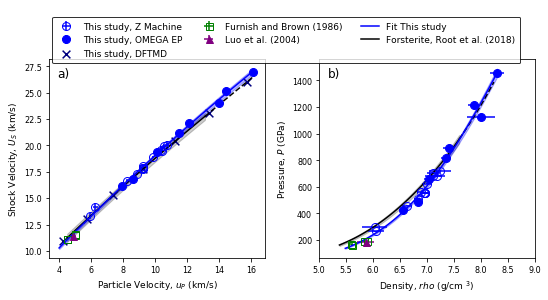

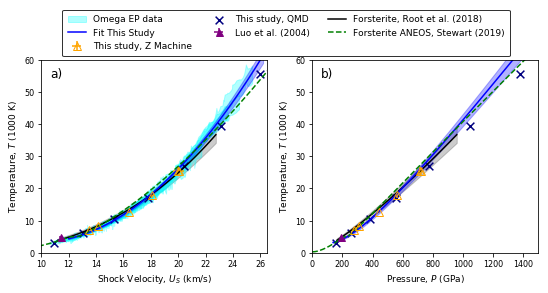

In [18]:
#Dealing with Covariance plots
#Use T-Us fit to calculate a series of Ts for a given Us
lmatT=sp.linalg.cholesky(CovarT,lower=True)

U=np.linspace(12,26.2,1000)
T=Tfit(U,A_mean,B_mean,C_mean)

steps=10000
TT=np.zeros((steps,1000))
A1=np.zeros(steps)
B1=np.zeros(steps)
C1=np.zeros(steps)

for i in range(steps):
    #bmat=np.matmul(sp.rand(1,3), lmat) #For covariance calculation on the temperature
    B1[i]=-1
    temp_mat_T=sp.randn(3,1)
    bmatT=np.matmul(lmatT,temp_mat_T)
    A1[i]=A_mean+bmatT[0,0]
    B1[i]=B_mean+bmatT[1,0]
    C1[i]=C_mean+bmatT[2,0]
    TT[i,:]=Tfit(U,A1[i],B1[i],C1[i])
TT_mean=np.zeros(1000)
TT_std=np.zeros(1000)
for i in range(1000):
    TT_mean[i]=np.mean(TT[:,i])
    TT_std[i]=np.std(TT[:,i])

#Double check fit
A1_mean=np.mean(A1)
B1_mean=np.mean(B1)
C1_mean=np.mean(C1)
print("A,B,C",A1_mean,B1_mean,C1_mean)


#Set arrays
steps = 10000
size = 100
upfor=np.linspace(4.5,13.1,size)
upforextrap=np.linspace(13.1,16.2,size)
up = np.linspace(4.0,16.1,size)
Usmcfor=sp.zeros((size,steps))
Usmcforextrap=sp.zeros((size,steps))
Usmcol = sp.zeros((size,steps))
UsRoot=sp.zeros(size)
UsRoote=sp.zeros(size)
UsTS = sp.zeros(size)
UsTSe = sp.zeros(size)
Usforextrap = sp.zeros(size)

PHmcfor = sp.zeros((size,steps))
PHmcforextrap = sp.zeros((size,steps))
rhoHmcfor = sp.zeros((size,steps))
rhoHmcforextrap = sp.zeros((size,steps))
PHfor = sp.zeros(size)
PHfore = sp.zeros(size)
PHforextrap = sp.zeros(size)
rhoHfor = sp.zeros(size)
rhoHfore = sp.zeros(size)
rhoHforextrap = sp.zeros(size)
rhoHmcol = sp.zeros((size,steps))
rhoHol = sp.zeros(size)
rhoHole = sp.zeros(size)
PHmcol = sp.zeros((size,steps))
PHol = sp.zeros(size)
PHole = sp.zeros(size)

THmcfor = sp.zeros((size,steps))
THfor = sp.zeros(size)
THfore = sp.zeros(size)

THmcol = sp.zeros((size,steps))
THol = sp.zeros(size)
THole = sp.zeros(size)

j=0
while j < steps:
    #forsterite calculations
    afor = 6.89 + sp.randn()*0.19
    bfor = 1.22 + sp.randn()*0.02
    cfor = 1.50 + sp.randn()*0.26
    dfor = 0.40 + sp.randn()*0.05
        
    usfor=univ_fit(upfor,afor,bfor,cfor,dfor) #getting shock velocity
    usforextrap=univ_fit(upforextrap,afor,bfor,cfor,dfor)
    Usmcfor[:,j]=usfor
    Usmcforextrap[:,j]=usforextrap
        
    rhofor = 3220.0 + 0.03*3220.0*sp.randn()
    rhoHmcfor[:,j] = (usfor/(usfor-upfor))*rhofor
    PHmcfor[:,j] = rhofor * usfor * 1000.0 * upfor * 1000.0  
    rhoHmcforextrap[:,j] = (usforextrap/(usforextrap-upforextrap))*rhofor
    PHmcforextrap[:,j] = rhofor * usforextrap * 1000.0 * upforextrap * 1000.0 
    
    temp_mat_Tfor=sp.randn(3,1)
    bmat_Tfor=np.matmul(lmatfor,temp_mat_Tfor) 
    Afor = -183.1877 + bmat_Tfor[0,0]
    Bfor = 15.6049 + bmat_Tfor[1,0]
    Cfor = 2.7848 + bmat_Tfor[2,0]
    THfor = Tfitfor(usfor,Afor,Bfor,Cfor)
    THmcfor[:,j] = THfor
    
    
    #olivine calculations
    temp_mat=sp.randn(3,1)
    bmat=np.matmul(lmat,temp_mat)    
    aol=afit+bmat[0,0]
    bol=bfit+bmat[1,0] 
    col = cfit+bmat[2,0]
    usol = quad_hug(up,aol,bol,col)  
    Usmcol[:,j]=usol
    
    rhool = 3350.0 + 0.02*3350.0*sp.randn()
    rhoHmcol[:,j] = (usol/(usol-up))*rhool
    PHmcol[:,j] = rhool * usol * 1000.0 * up * 1000.0
    
    temp_mat_Tol=sp.randn(3,1)
    bmat_Tol=np.matmul(lmatT,temp_mat_Tol) 
    Aol = A_mean + bmat_Tol[0,0]
    Bol = B_mean + bmat_Tol[1,0]
    Col = C_mean + bmat_Tol[2,0]
    THol = Tfit(usol,Aol,Bol,Col)
    THmcol[:,j] = THol
        
    j=j+1
for i in range(0,size):
    UsRoot[i]=np.mean(Usmcfor[i,:])
    UsRoote[i]=np.std(Usmcfor[i,:])
    UsTS[i] = np.mean(Usmcol[i,:])
    UsTSe[i] = np.std(Usmcol[i,:])
    Usforextrap[i] = np.mean(Usmcforextrap[i,:])
    PHfor[i] = np.mean(PHmcfor[i,:])
    PHfore[i] = np.std(PHmcfor[i,:])
    PHforextrap[i] = np.mean(PHmcforextrap[i,:])
    rhoHfor[i] = np.mean(rhoHmcfor[i,:])
    rhoHfore[i] = np.std(rhoHmcfor[i,:])
    rhoHforextrap[i] = np.mean(rhoHmcforextrap[i,:])
    rhoHol[i] = np.mean(rhoHmcol[i,:])
    rhoHole[i] = np.std(rhoHmcol[i,:])
    PHol[i] = np.mean(PHmcol[i,:])
    PHole[i] = np.std(PHmcol[i,:])
    THfor[i] = np.mean(THmcfor[i,:])
    THfore[i] = np.std(THmcfor[i,:])
    THol[i] = np.mean(THmcol[i,:])
    THole[i] = np.std(THmcol[i,:])
    
    
# Us-up and P-rho plot
import matplotlib.pyplot as plt
from matplotlib import gridspec

gs = gridspec.GridSpec(1, 2,wspace=0.25,hspace=0.2,left=0.08,right=0.98,top=0.8,bottom=0.11) 
font = {'family' : 'ariel',
            'weight' : 'normal',
            'size'   : 8}
mpl.rc('font', **font)

fig = plt.figure(figsize=(7.5,4))

ax1 = fig.add_subplot(gs[0])
ax1.plot(upfor,UsRoot,color = 'black',label = 'Forsterite, Root et al. (2018)')
ax1.plot(upforextrap,Usforextrap,'k--')
ax1.fill_between(upfor,(UsRoot-UsRoote),(UsRoot+UsRoote),color = 'black',alpha=0.2)
ax1.plot(up,UsTS,color='blue',label = 'Fit This study')
ax1.fill_between(up,(UsTS-UsTSe),(UsTS+UsTSe),color='blue',alpha=0.3)
ax1.errorbar(upZ,UsZ,xerr = upZerr, yerr = UsZerr, fmt = ',', marker = 'o',\
             color='blue',mfc='None', label = 'This study, Z Machine', markersize = 8,alpha=1)
ax1.errorbar(upmeasolEP,UsmeasolEP,xerr = upmeasolEPerr, yerr = UsmeasolEPerr, fmt = ',', marker = 'o',\
             color='blue', mfc='blue', label = 'This study, OMEGA EP', markersize = 8,alpha=1)
ax1.scatter(QMDup,QMDUs, marker = 'x',\
            color = 'navy', label = 'This study, DFTMD',s=60)
ax1.errorbar(upmeasolGG,UsmeasolGG,xerr = upmeasolGGerr, yerr = UsmeasolGGerr, fmt = ',', marker = 's',\
             color='green', mfc='None', label = 'Furnish and Brown (1986)', markersize = 7,alpha=1)
ax1.errorbar(upmeasolLuo,UsmeasolLuo,xerr = upmeasolLuoerr, yerr = UsmeasolLuoerr, fmt = ',', marker = '^',\
             color='purple', mfc='purple', label = 'Luo et al. (2004)', markersize = 7,alpha=1)
ax1.text(0.04, 0.96, 'a)', horizontalalignment='left',\
            verticalalignment='top', fontsize=12,transform=ax1.transAxes, color='k')
ax1.set_xlabel('Particle Velocity, $u_{P}$ (km/s)',fontsize=9)
ax1.set_ylabel('Shock Velocity, $U_{S}$ (km/s)',fontsize=9)

handles, labels = ax1.get_legend_handles_labels()
print(labels)
order = [3,4,2,5,6,1,0]
fig.legend([handles[idx] for idx in order],[labels[idx] for idx in order],\
           loc='upper center',ncol=3,bbox_to_anchor=(0.53,1.0),borderpad=0.6,\
           fontsize=9,fancybox=True,edgecolor='black')


ax2 = fig.add_subplot(gs[1])
ax2.plot(rhoHfor/10**3,PHfor/10**9,color = 'k',label = 'Root et al. 2018')
ax2.plot(rhoHforextrap/10**3,PHforextrap/10**9,'k--',label = 'Root et al. 2018, extrapolated')
ax2.fill_between(rhoHfor/10**3,PHfor/10**9+PHfore/10**9,PHfor/10**9-PHfore/10**9,color = 'k',alpha=0.2)
ax2.plot(rhoHol/10**3,PHol/10**9,color='blue',label = 'Fit This study')
ax2.fill_between(rhoHol/10**3,PHol/10**9-PHole/10**9,PHol/10**9+PHole/10**9,color = 'blue',alpha=0.3)
ax2.errorbar(rhomeasolEP,PmeasolEP,xerr = rhomeasolEPerr, yerr = PmeasolEPerr,fmt = ',', marker = 'o',\
             color='blue', mfc='blue', label = 'This study, OMEGA EP', markersize = 8,alpha=1)
ax2.errorbar(rhoZ,PZ,xerr = rhoZerr, yerr = PZerr, fmt = ',', marker = 'o',\
             color='blue',mfc='None', label = 'This study, Z Machine', markersize = 8,alpha=1)
ax2.scatter(QMDrho/1000,QMDP, marker = 'x',\
            color = 'navy', label = 'This study, QMD', s = 60)
ax2.errorbar(rhomeasolGG,PmeasolGG,xerr = rhomeasolGGerr, yerr = PmeasolGGerr,fmt = ',', marker = 's',\
             color='green', mfc='None', label = 'Furnish and Brown, 1986', markersize = 7)
ax2.errorbar(rhomeasolLuo,PmeasolLuo,xerr = rhomeasolLuoerr, yerr = PmeasolLuoerr,fmt = ',', marker = '^',\
             color='purple', mfc='purple', label = 'Luo et al. 2004', markersize = 7)
ax2.text(0.04, 0.96, 'b)', horizontalalignment='left',\
            verticalalignment='top', fontsize=12,transform=ax2.transAxes, color='k')
ax2.set_xlabel('Density, $rho$ (g/cm $^3$)',fontsize=9)
ax2.set_ylabel('Pressure, $P$ (GPa)',fontsize=9)
ax2.set_xlim(5.0,9.0)

plt.show()

##T-Us and P-T plot

gs = gridspec.GridSpec(1, 2,wspace=0.2,hspace=0.2,left=0.06,right=0.98,top=0.80,bottom=0.13) 
font = {'family' : 'ariel',
            'weight' : 'normal',
            'size'   : 8}
mpl.rc('font', **font)

fig = plt.figure(figsize=(7.5,4))

ax1 = fig.add_subplot(gs[0])
ax1.plot(UsRoot,THfor/1000,color = 'k',label = 'Forsterite, Root et al. (2018)')
ax1.fill_between(UsRoot,THfor/1000+THfore/1000,THfor/1000-THfore/1000,color='k',alpha=0.2)
ax1.fill_between(s30744[0],(s30744[3]-0.05*s30744[3])/1000,(s30744[3]+0.05*s30744[3])/1000,\
                 label="Omega EP data",color='cyan',alpha=0.3)
ax1.fill_between(s30747[0],(s30747[3]-0.05*s30747[3])/1000,(s30747[3]+0.05*s30747[3])/1000,\
         color='cyan',alpha=0.3)
ax1.fill_between(s30750[0],(s30750[3]-0.05*s30750[3])/1000,(s30750[3]+0.05*s30750[3])/1000,\
         color='cyan',alpha=0.3)
ax1.fill_between(s30753[0],(s30753[3]-0.05*s30753[3])/1000,(s30753[3]+0.05*s30753[3])/1000,
         color='cyan',alpha=0.3)
ax1.fill_between(s31844[0],(s31844[3]-0.05*s31844[3])/1000,(s31844[3]+0.05*s31844[3])/1000,
         color='cyan',alpha=0.3)
ax1.fill_between(s31849[0],(s31849[3]-0.05*s31849[3])/1000,(s31849[3]+0.05*s31849[3])/1000,
         color='cyan',alpha=0.3)
ax1.fill_between(s31854[0],(s31854[3]-0.05*s31854[3])/1000,(s31854[3]+0.05*s31854[3])/1000,
         color='cyan',alpha=0.3)
ax1.fill_between(s31859[0],(s31859[3]-0.05*s31859[3])/1000,(s31859[3]+0.05*s31859[3])/1000,
         color='cyan',alpha=0.3)
ax1.plot(U,TT_mean/1000,color = 'blue',label = 'Fit This Study')
ax1.fill_between(U,TT_mean/1000+TT_std/1000,TT_mean/1000-TT_std/1000,color='blue',alpha=0.3)
ax1.errorbar(ZUs_temp,ZT_temp/1000,xerr = ZUs_temp_err, yerr = ZT_temp_err/1000,fmt = ',', marker = '^',\
             color='orange',mfc='None', markersize = 8,label='This study, Z Machine',alpha=1)
ax1.scatter(QMDUs,QMDT/1000, color ='navy',marker='x',\
             s=60,label='This study, QMD')
ax1.errorbar(11.46,4810/1000,xerr = 0.16, yerr = 70/1000,fmt = ',', marker = '^',\
             color='purple', mfc='purple', label = 'Luo et al. (2004)', markersize = 7,alpha=1)
ax1.plot(NewANEOS[6],NewANEOS[0]/1000,'--',color='green',label="Forsterite ANEOS, Stewart (2019)")
ax1.text(0.04, 0.96, 'a)', horizontalalignment='left',\
            verticalalignment='top', fontsize=12,transform=ax1.transAxes, color='k')
ax1.set_ylim(0,60)
ax1.set_xlim(10,26.5)
ax1.set_xlabel('Shock Velocity, $U_{S}$ (km/s)',fontsize=9)
ax1.set_ylabel('Temperature, $T$ (1000 K)',fontsize=9)

handles, labels = ax1.get_legend_handles_labels()
order = [3,1,5,4,6,0,2]
fig.legend([handles[idx] for idx in order],[labels[idx] for idx in order],\
           loc='upper center',ncol=3,bbox_to_anchor=(0.53,1.0),\
           borderpad=0.6,fontsize=9,fancybox=True,edgecolor='black')

ax2 = fig.add_subplot(gs[1])
ax2.plot(PHfor/10**9,THfor/1000,color = 'k',label = 'Root et al. 2018')
ax2.fill_between(PHfor/10**9,THfor/1000+THfore/1000,THfor/1000-THfore/1000,color='k',alpha=0.2)
ax2.plot(PHol/10**9,THol/1000,color = 'blue',label = 'This study')
ax2.fill_between(PHol/10**9,THol/1000+THole/1000,THol/1000-THole/1000,color='blue',alpha=0.3)
ax2.scatter(QMDP,QMDT/1000, color ='navy',marker='x',\
             s=60,label='This study, QMD')
ax2.errorbar(ZP_temp,ZT_temp/1000,xerr = ZP_temp_err, yerr = ZT_temp_err/1000,fmt = ',', marker = '^',\
             color='orange',mfc='None', markersize = 8,label='This study, Z Machine')
ax2.errorbar(188,4810/1000,xerr = 6, yerr = 70/1000,fmt = ',', marker = '^',\
             color='purple', mfc='purple', label = 'Luo et al. 2004', markersize = 7)
ax2.plot(NewANEOS[2],NewANEOS[0]/1000,'--',color='green',label="New ANEOS Hugoniot (forsterite), Stewart et al. (2019)")
ax2.text(0.04, 0.96, 'b)', horizontalalignment='left',\
            verticalalignment='top', fontsize=12,transform=ax2.transAxes, color='k')
ax2.set_xlabel('Pressure, $P$ (GPa)',fontsize=9)
ax2.set_ylabel('Temperature, $T$ (1000 K)',fontsize=9)
plt.ylim(0,60)
plt.xlim(0,1500)

plt.show()
    

Reflectivity - Us fit

In [21]:
from matplotlib.ticker import ScalarFormatter
import matplotlib as mpl
import numpy as np
import scipy as sp
import matplotlib.cm as cm
from scipy.optimize import least_squares
from scipy import odr

#Reflectivity data with 5% error
RT = np.genfromtxt('RvUs.csv',delimiter=',',usecols=[0])
RTe = RT*0.05
#Us data with 1% error
UT = np.genfromtxt('RvUs.csv',delimiter=',',usecols=[1])
UTe = UT*0.01

##Fit to reflectivity vs. Us from Igor
def HillPower(p,Us):
    return p[0] + ((p[1] - p[0]) * Us**p[2] / (p[3]**p[2] + Us**p[2]))

we = 1/(UTe**2)
wd = 1/(RTe**2)

mod = sp.odr.Model(HillPower)
data = sp.odr.RealData(UT,RT, UTe,RTe)
myodr = sp.odr.ODR(data, mod, beta0=[0.1, 25,11.,19.])
myoutput = myodr.run()
myoutput.pprint()

Beta: [ 0.08181378 31.03903275 11.27009468 19.73818428]
Beta Std Error: [0.00196042 0.5220217  0.05853726 0.05395045]
Beta Covariance: [[ 6.20252856e-07 -6.34795998e-05  1.41691088e-05 -8.78600258e-06]
 [-6.34795998e-05  4.39792426e-02 -3.24108427e-03  4.23508328e-03]
 [ 1.41691088e-05 -3.24108427e-03  5.53013078e-04 -4.35558199e-04]
 [-8.78600258e-06  4.23508328e-03 -4.35558199e-04  4.69743537e-04]]
Residual Variance: 6.196256235370569
Inverse Condition #: 0.013955718115930887
Reason(s) for Halting:
  Sum of squares convergence


Plots

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['ariel'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


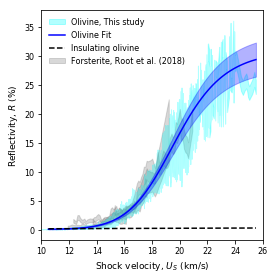

In [22]:
#Forsterite data
#Forsterite
FU1=np.loadtxt('s77775_071917_DEF.txt',skiprows=1,usecols=[0])
FUe1=np.loadtxt('s77775_071917_DEF.txt',skiprows=1,usecols=[1])
FR1=np.loadtxt('s77775_071917_DEF.txt',skiprows=1,usecols=[4])
FRe1=np.loadtxt('s77775_071917_DEF.txt',skiprows=1,usecols=[5])
FT1=np.loadtxt('s77775_071917_DEF.txt',skiprows=1,usecols=[2])
FTe1=np.loadtxt('s77775_071917_DEF.txt',skiprows=1,usecols=[3])
#DTe1=((190**2)+(0.52**2)*(DU1**3.036)**2+((3.56*3.036*DU1**2.036)**2)*DUe1**2+((3.56*np.log(DU1)*DU1**3.036)**2)*(0.05**2))**(1/2)

FU2=np.loadtxt('s77776_071917_DEF.txt',skiprows=1,usecols=[0])
FUe2=np.loadtxt('s77776_071917_DEF.txt',skiprows=1,usecols=[1])
FR2=np.loadtxt('s77776_071917_DEF.txt',skiprows=1,usecols=[4])
FRe2=np.loadtxt('s77776_071917_DEF.txt',skiprows=1,usecols=[5])
FT2=np.loadtxt('s77776_071917_DEF.txt',skiprows=1,usecols=[2])
FTe2=np.loadtxt('s77776_071917_DEF.txt',skiprows=1,usecols=[3])

FU3=np.loadtxt('s77779_071917_DEF.txt',skiprows=1,usecols=[0])
FUe3=np.loadtxt('s77779_071917_DEF.txt',skiprows=1,usecols=[1])
FR3=np.loadtxt('s77779_071917_DEF.txt',skiprows=1,usecols=[4])
FRe3=np.loadtxt('s77779_071917_DEF.txt',skiprows=1,usecols=[5])
FT3=np.loadtxt('s77779_071917_DEF.txt',skiprows=1,usecols=[2])
FTe3=np.loadtxt('s77779_071917_DEF.txt',skiprows=1,usecols=[3])

FU4=np.loadtxt('s77780_071917_DEF.txt',skiprows=1,usecols=[0])
FUe4=np.loadtxt('s77780_071917_DEF.txt',skiprows=1,usecols=[1])
FR4=np.loadtxt('s77780_071917_DEF.txt',skiprows=1,usecols=[4])
FRe4=np.loadtxt('s77780_071917_DEF.txt',skiprows=1,usecols=[5])
FT4=np.loadtxt('s77780_071917_DEF.txt',skiprows=1,usecols=[2])
FTe4=np.loadtxt('s77780_071917_DEF.txt',skiprows=1,usecols=[3])


#Extrapolating static index of refraction
staticrho = [3.35,3.585,3.701]
staticeta = [1.642,1.713,1.74]

def GD(rho,a,b):
    return a + b*rho

temp1, temp2 = curve_fit(GD, staticrho, staticeta)

a = temp1[0]
b = temp1[1]

##Fit to reflectivity vs. Us from Igor
def HillPower(Us,start,end,n,k):
    return start + ((end - start) * Us**n / (k**n + Us**n))


params = [ 0.08181378, 31.03903275, 11.27009468, 19.73818428]
cov = [[ 6.20252856e-07, -6.34795998e-05,  1.41691088e-05, -8.78600258e-06],
 [-6.34795998e-05,  4.39792426e-02, -3.24108427e-03,  4.23508328e-03],
 [ 1.41691088e-05, -3.24108427e-03,  5.53013078e-04, -4.35558199e-04],
 [-8.78600258e-06,  4.23508328e-03, -4.35558199e-04,  4.69743537e-04]]
lmatR = sp.linalg.cholesky(cov,lower=True)


steps=100000
size = 100
Us  = np.linspace(10.5,25.5,size)
RHmc = np.ones((size,steps))
Ref = np.ones(size)
Refe = np.ones(size)
Ri = np.ones((size,steps))
Rinsul = np.ones(size)
for i in range(steps):    
    
    temp_mat=sp.randn(4,1)
    bmat=np.matmul(lmatR,temp_mat)    
    
    start_mc = params[0] + bmat[0,0]
    end_mc = params[1] + bmat[1,0]
    n_mc = params[2] + bmat[2,0]
    k_mc = params[3] + bmat[3,0]
    #a_mc = params[4] + bmat[4,0]
    
    RH = HillPower(Us,start_mc,end_mc,n_mc,k_mc)
    RHmc[:,i] = RH
    
    eta = a * (Us*3.35/(Us-(56-2*np.sqrt(847 - 50*Us/3)))) + b
    Ri[:,i] = (eta-1.642)**2/(eta+1.642)**2
    
for i in range(0,size):
    Ref[i]=np.median(RHmc[i,:])
    Refe[i]=np.std(RHmc[i,:]) 
    Rinsul[i] = np.median(Ri[i,:])
    
##plots
plt.figure(figsize=(3.75,3.75))
font = {'family' : 'ariel',
            'weight' : 'normal',
            'size'   : 8}
plt.subplots_adjust(left=0.15,right=0.97,top=0.98,bottom=0.13)
plt.fill_between(FU1,(FR1+FRe1)*100,(FR1-FRe1)*100,color='grey',alpha=0.3,label='Forsterite, Root et al. (2018)')
plt.fill_between(FU2,(FR2+FRe2)*100,(FR2-FRe2)*100,color='grey',alpha=0.3)
plt.fill_between(FU3,(FR3+FRe3)*100,(FR3-FRe3)*100,color='grey',alpha=0.3)
plt.fill_between(FU4,(FR4+FRe4)*100,(FR4-FRe4)*100,color='grey',alpha=0.3)
plt.fill_between(UT,RT-RTe,RT+RTe,color='cyan',alpha=0.3,label='Olivine, This study')
plt.fill_between(Us,Ref+0.1*Ref,Ref-0.1*Ref,alpha=0.3,color='blue')
plt.plot(Us,Ref,color='blue',label = 'Olivine Fit')
plt.plot(Us,Rinsul,'k--',label='Insulating olivine')
plt.xlim(10,26)
plt.gca().yaxis.set_major_formatter(ScalarFormatter())
ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
order = [3,0,1,2]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],frameon = False,loc=2)

plt.xlabel('Shock velocity, $U_{S}$ (km/s)',fontsize=9)
plt.ylabel('Reflectivity, $R$ (%)',fontsize=9)
plt.show()